Proszę zebrać 50 różnych tekstów. minimum 300 słów (do 800).

TF – term frequency\
IDF – inverse document frequency

TF-IDF = TF*IDF

TF = liczba wystąpień danego słowa w tekście (dokumencie) podzielona przez liczbę wszystkich słów w tekście\
IDF = logarytm z liczby wszystkich tekstów/dokumentów w korpusie podzielonej przez liczbę tekstów zawierających szukane słowo


## ZADANIE
Proszę napisać aplikację, która wczyta cały korpus (policzy wszystkie TF, IDF i TF-IDF) i wygeneruje po 10 słów/termów najlepiej opisujących poszczególne teksty. 
Wyświetlić w formie tabeli.

## Przykład

100 tekstów o tematyce kociej (wszystkie zawierają słowo kot, w 30 jest karma, w 5 poduszka)

TF(kot,tekst1) = 5/200 = 0,025\
IDF = log(100/100) = log(1) = 0\
TF-IDF(kot,tekst1) = TF*IDF = 0,025 * 0 = 0

TF(kot,tekst2) = 1/100 = 0,01\
IDF = log(100/100) = log(1) = 0\
TF-IDF(kot,tekst2) = TF*IDF = 0,01 * 0 = 0

TF(karma,tekst1) = 3/200 = 0,015\
IDF = log(100/30) = log(3,33) = 0,52\
TF-IDF(karma,tekst1) = TF*IDF = 0,015 * 0,52 = 0,0078

TF(karma,tekst2) = 10/100 = 0,1\
IDF = log(100/30) = log(3,33) = 0,52\
TF-IDF(karma,tekst2) = TF*IDF = 0,1 * 0,52 = 0,052

TF(poduszka,tekst1) = 10/200 = 0,05\
IDF = log(100/5) = log(20) = 1,3\
TF-IDF(poduszka,tekst1) = TF*IDF = 0,05 * 1,3 = 0,065

TF(poduszka,tekst2) = 1/100 = 0,01\
IDF = log(100/5) = log(20) = 1,3\
TF-IDF(poduszka,tekst2) = TF*IDF = 0,01 * 1,3 = 0,013

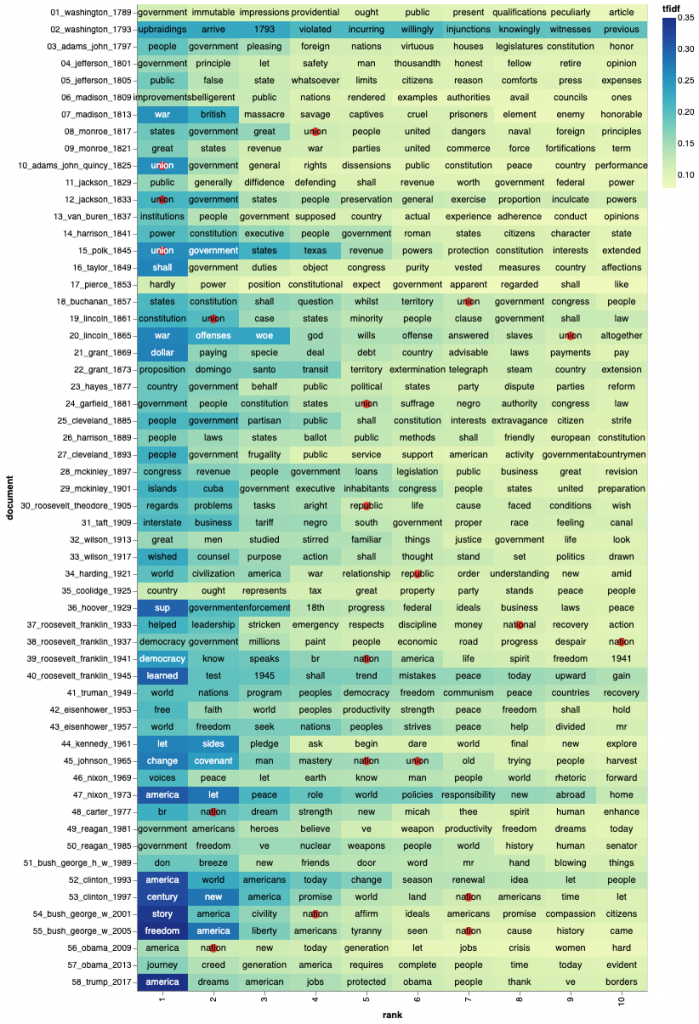

In [8]:
from clp3 import clp
import csv
import math
import re
from collections import Counter, defaultdict

def base(word):
    word = word.lower()
    word = re.sub(r'[^a-ząęśółżźćń]+', '', word)
    ids = clp.rec(word)
    if ids:
        return clp.bform(ids[0])
    return word

def clean(text):
    words = re.findall(r'[a-ząęśółżźćńA-ZĄĘŚÓŁŻŹĆŃ]+', text)
    base_forms = [base(word) for word in words]
    return base_forms

def load(folder_name="TXT"):
    texts = []
    for i in range(1,51):
        with open(f"{folder_name}/{i}.txt", "r", encoding="utf-8") as file:
            text = file.read()
            base_forms = clean(text)
            texts.append(base_forms)
    return texts

def tf(texts):
    #TF = (Liczba wyst. slowa w tekscie) / (calk. liczba slow w tekscie)
    tf_list = []
    for text in texts:
        tf_text = {}
        term_count = Counter(text)
        total_words = len(text)
        for term, count in term_count.items():
            tf_text[term] = count/total_words
        tf_list.append(tf_text)
    return tf_list

def idf(texts):
    #IDF = log((Liczba wszystkich tekstów) / (Liczba tekstów zaw. dane słowo))
    N = len(texts)
    text_count = defaultdict(int)
    for text in texts:
        words = set(text)
        for word in words:
            text_count[word] += 1
    idf_dict = {}
    for term, df in text_count.items():
        idf_dict[term] = math.log(N/df)
    return idf_dict

def tfidf(tf_list, idf_dict):
    # TF-IDF = TF * IDF
    tfidf_list = []
    for tf_doc in tf_list:
        tfidf_doc = {w: tf_doc[w] * idf_dict.get(w, 0) for w in tf_doc}
        tfidf_list.append(tfidf_doc)
    return tfidf_list

def top_terms(tfidf_list, n=10):
    results = []
    for doc_index, tfidf_doc in enumerate(tfidf_list):
        sorted_terms = sorted(tfidf_doc.items(), key=lambda x: x[1], reverse=True)
        row = {f"Text": f"{doc_index + 1}.txt"}
        for i in range(n):
            term = sorted_terms[i][0] if i < len(sorted_terms) else ""
            row[f"Word {i+1}"] = term
        
        results.append(row)
    return results

def table(result, filename="result.csv"):
    fieldnames = list(result[0].keys())
    with open(filename, "w", encoding="utf-8") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames)
        writer.writeheader()
        writer.writerows(result)

texts = load()
tf_values = tf(texts)
idf_values = idf(texts)
tfidf_values = tfidf(tf_values, idf_values) 
final_results = top_terms(tfidf_values, n=10)
table(final_results)